# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Gruber Thomas 

Datum: 20.11.2023

Gruppe: 09

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Können wir mithilfe eingfacher Mittel wie Temperatursensoren und einem Becher voll Wasser das Newtonsche Abkühlungsgesetz bestätigen?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="figures/newton" width="800">

## Versuchsauswertung

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [3]:
#path to the file
path = 'data/newton_data/newton_data.h5'

In [4]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import h5py as h5
with h5.File(path) as i:
    # save group1 in example.h5 to variable g.
    g = i["RawData"]
    # read group1 attribute authors.
    timestamp_2 = i["RawData/1ee879eb-49a9-6636-ae3d-ef2e9204f1c2/timestamp"]
    temperature_2 = i["RawData/1ee879eb-49a9-6636-ae3d-ef2e9204f1c2/temperature"]
    timestamp_1 = i["RawData/1ee879e0-010f-64d4-a045-f88d645a496a/timestamp"]
    temperature_1 = i["RawData/1ee879e0-010f-64d4-a045-f88d645a496a/temperature"]
    print(timestamp_1[10])
    time_stamp_1=np.array(timestamp_1)
    temperature__1=np.array(temperature_1)
    time_stamp_2=np.array(timestamp_2)
    temperature__2=np.array(temperature_2)
# DONE #

16.829262256622314


#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


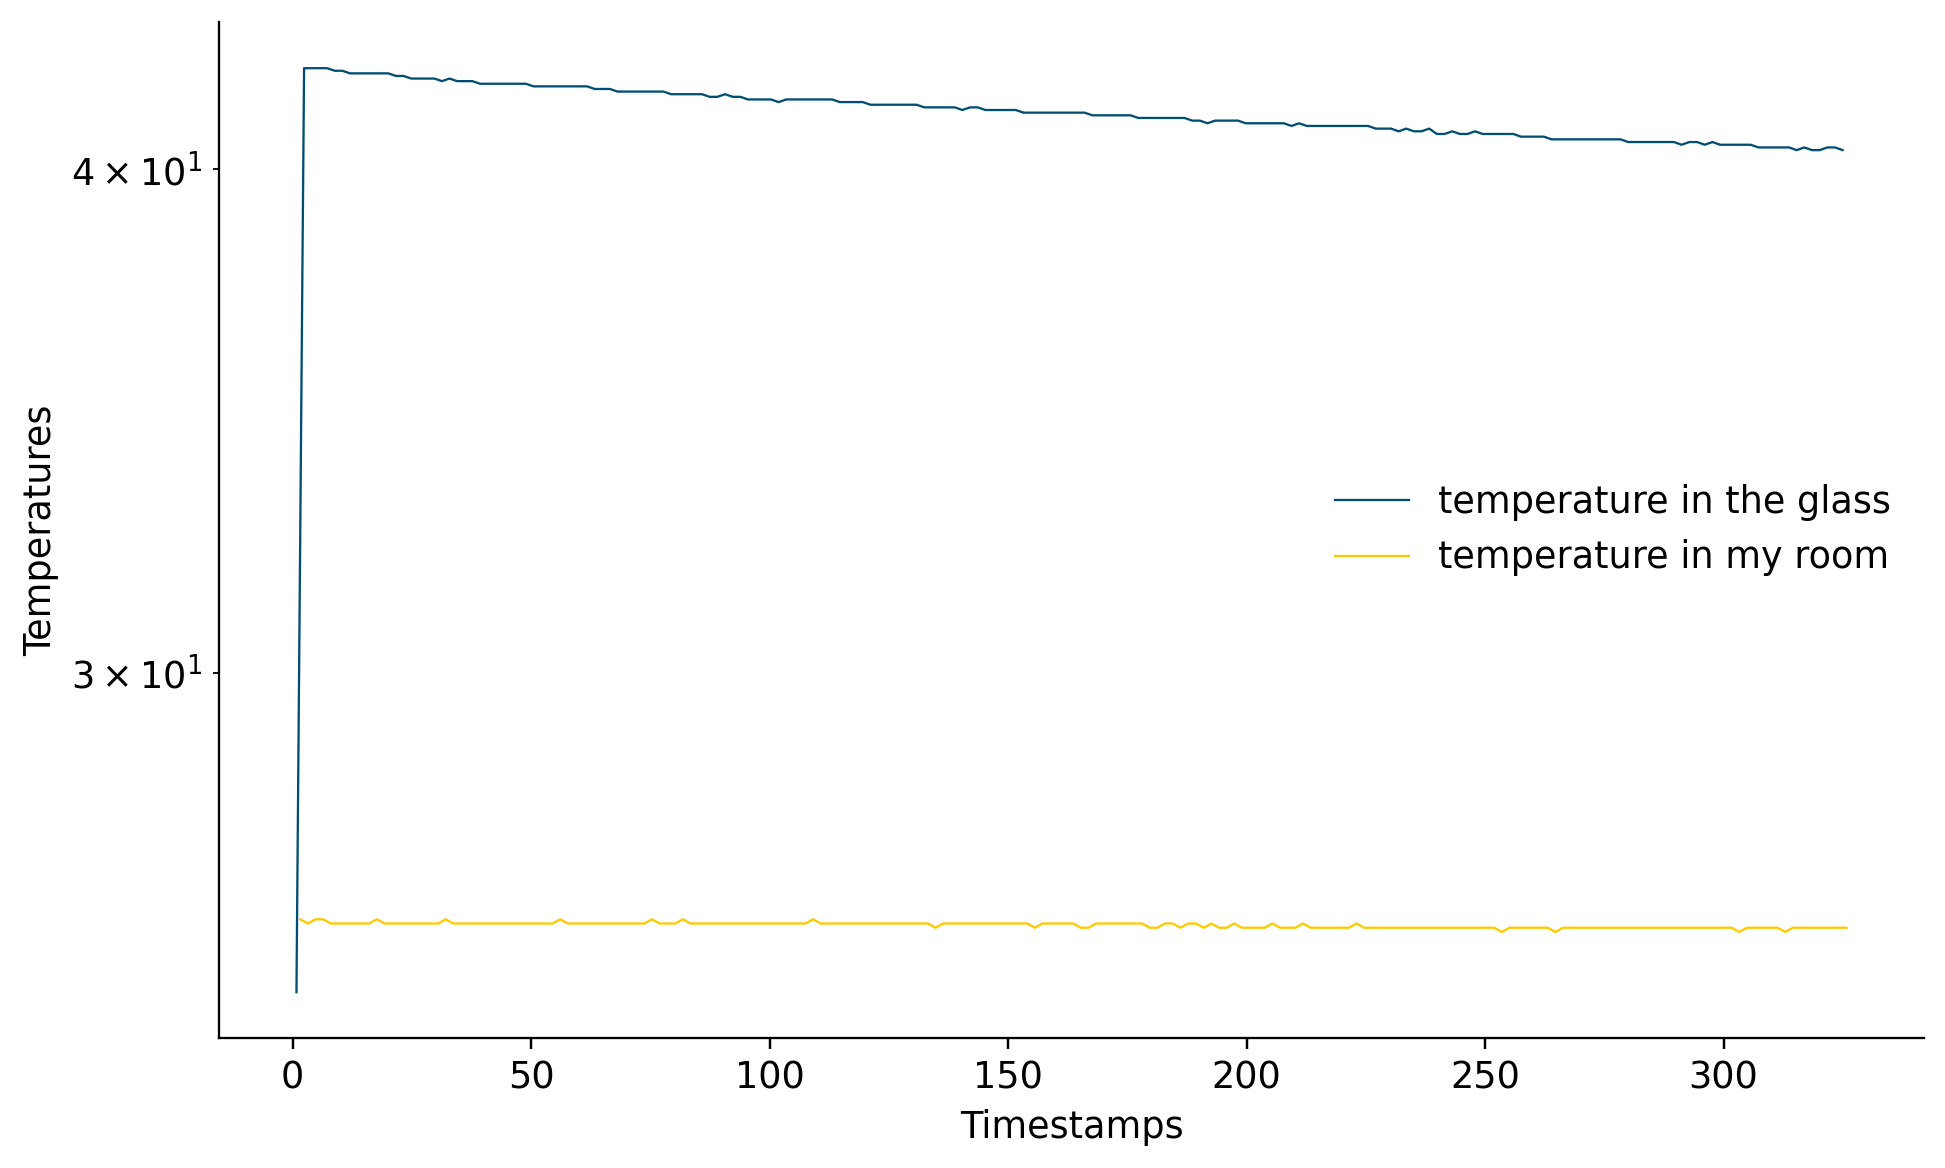

In [5]:
# TODO: Use the temperature and time data for plotting
import h5py
        # Open the HDF5 file in read mode
# Plotting both of the graphs
plt.figure(figsize=(10, 6))
plt.plot(time_stamp_1, temperature__1,label='temperature in the glass')
plt.plot(time_stamp_2, temperature__2,label='temperature in my room')
plt.xlabel('Timestamps')
plt.ylabel('Temperatures')
plt.yscale("log")
plt.legend()
plt.show()

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [12]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
import numpy as np

# Your data: time (t) and tcalorimetry_homeemperature (T)
num_points = 10
t = np.linspace(0, 20, num_points)  # Replace this with your actual time data
T2 = temperature__1[14]
T1 = temperature__1[0]
Ttt = np.linspace(temperature__2[0], temperature__2[14], num_points)
T_t_minus_T2 = T1 - T2
# Create an array of the same length as t with the constant value log(Tt_minus_T2)
log_Ttt_minus_T2 = np.full_like(t, np.log(T2-Ttt))
# Linear fit to get the slope, which corresponds to the coefficient K
coefficients = np.polyfit(t, log_Ttt_minus_T2, 1)
# The coefficient K is the slope of the linear fit
K = coefficients[0]*(-1)




# DONE #

#### (iV) Ergebnis

In [11]:
# TODO: Print result

print("Der Koeffizient K ist:", K)
# DONE #

Der Koeffizient K ist: -0.00019342377218901978


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?


Das Ergebnis macht Sinn, da mit fortschreitender Zeit die Temperaturdifferenz sinkt.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.


Es war ein schöner Versuch. Physikalische Zusammenhänge mit modernen Methoden zu bestätigen war sehr lehrreich.